Epoch 100/1000, Loss: 0.6759569048881531
Epoch 200/1000, Loss: 0.49506786465644836
Epoch 300/1000, Loss: 0.369134783744812
Epoch 400/1000, Loss: 0.26168811321258545
Epoch 500/1000, Loss: 0.18908904492855072
Epoch 600/1000, Loss: 0.1516556739807129
Epoch 700/1000, Loss: 0.13491004705429077
Epoch 800/1000, Loss: 0.12754005193710327
Epoch 900/1000, Loss: 0.12384216487407684
Epoch 1000/1000, Loss: 0.12143485248088837


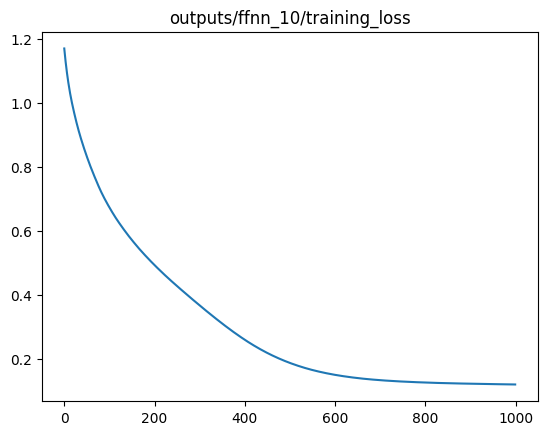

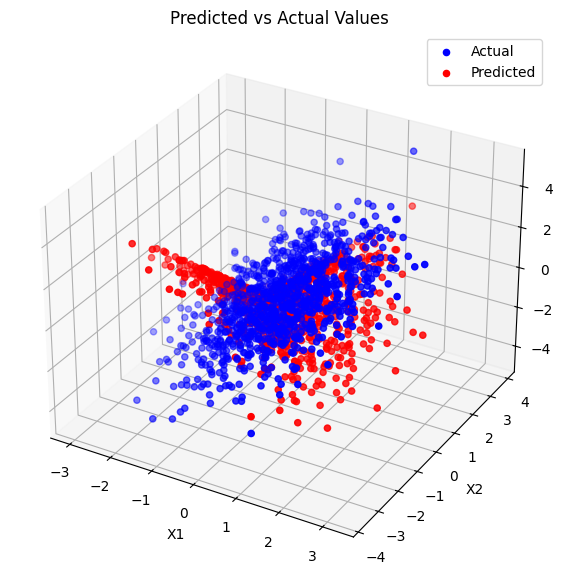

Epoch 100/1000, Loss: 0.5193334221839905
Epoch 200/1000, Loss: 0.28818604350090027
Epoch 300/1000, Loss: 0.1795826405286789
Epoch 400/1000, Loss: 0.1424909085035324
Epoch 500/1000, Loss: 0.13086551427841187
Epoch 600/1000, Loss: 0.12601380050182343
Epoch 700/1000, Loss: 0.12275339663028717
Epoch 800/1000, Loss: 0.12004793435335159
Epoch 900/1000, Loss: 0.1174561008810997
Epoch 1000/1000, Loss: 0.1150084063410759


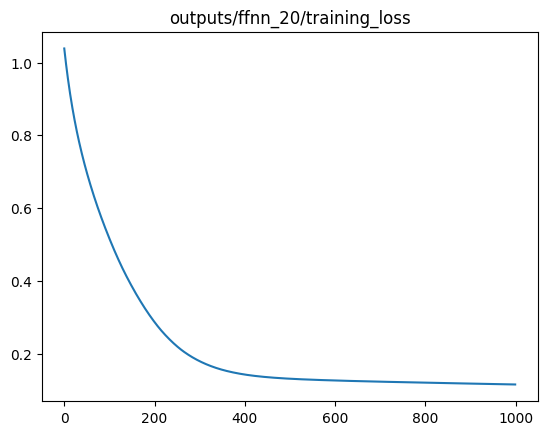

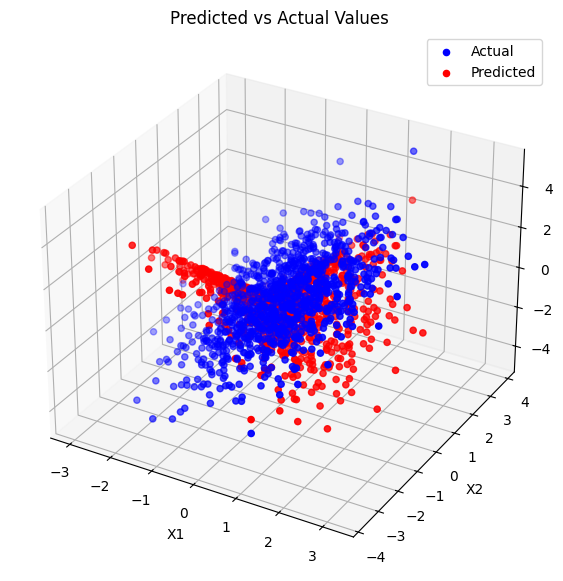

Epoch 100/1000, Loss: 0.421017587184906
Epoch 200/1000, Loss: 0.23977133631706238
Epoch 300/1000, Loss: 0.16448010504245758
Epoch 400/1000, Loss: 0.14053912460803986
Epoch 500/1000, Loss: 0.13330034911632538
Epoch 600/1000, Loss: 0.13018102943897247
Epoch 700/1000, Loss: 0.1278170794248581
Epoch 800/1000, Loss: 0.12550081312656403
Epoch 900/1000, Loss: 0.12309159338474274
Epoch 1000/1000, Loss: 0.12052737921476364


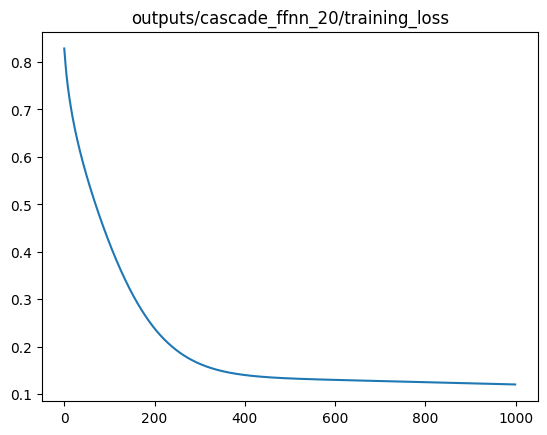

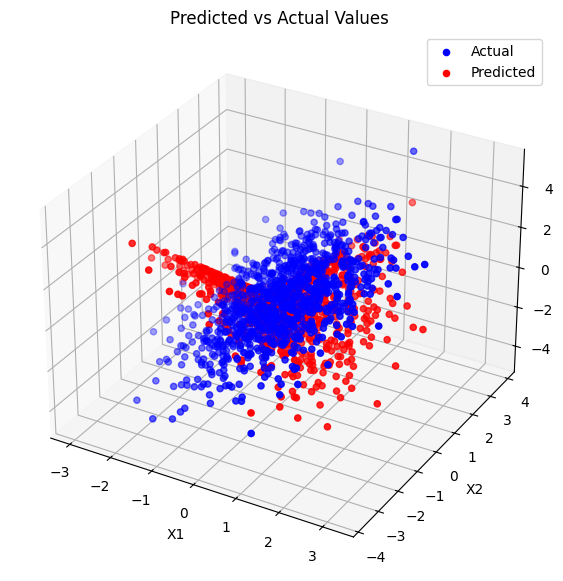

Epoch 100/1000, Loss: 0.6005077958106995
Epoch 200/1000, Loss: 0.25940918922424316
Epoch 300/1000, Loss: 0.15336020290851593
Epoch 400/1000, Loss: 0.13953636586666107
Epoch 500/1000, Loss: 0.13333243131637573
Epoch 600/1000, Loss: 0.1278352588415146
Epoch 700/1000, Loss: 0.12325633317232132
Epoch 800/1000, Loss: 0.11884782463312149
Epoch 900/1000, Loss: 0.11480892449617386
Epoch 1000/1000, Loss: 0.11092808842658997


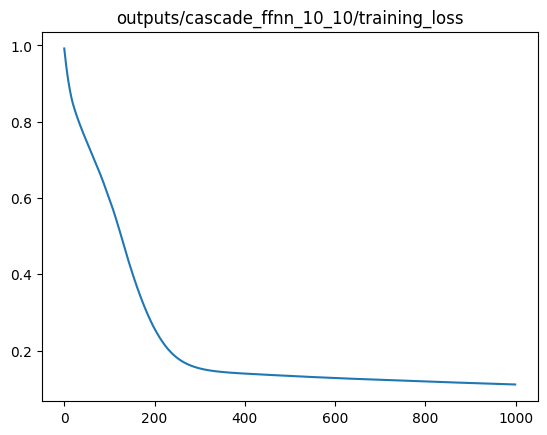

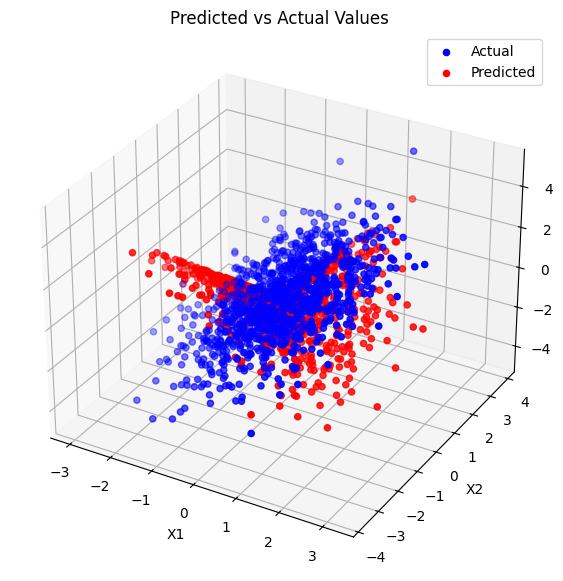

Epoch 100/1000, Loss: 0.734516978263855
Epoch 200/1000, Loss: 0.5083639621734619
Epoch 300/1000, Loss: 0.3761947751045227
Epoch 400/1000, Loss: 0.2862530052661896
Epoch 500/1000, Loss: 0.21864545345306396
Epoch 600/1000, Loss: 0.172695130109787
Epoch 700/1000, Loss: 0.14712591469287872
Epoch 800/1000, Loss: 0.1341848224401474
Epoch 900/1000, Loss: 0.1271209865808487
Epoch 1000/1000, Loss: 0.12227772176265717


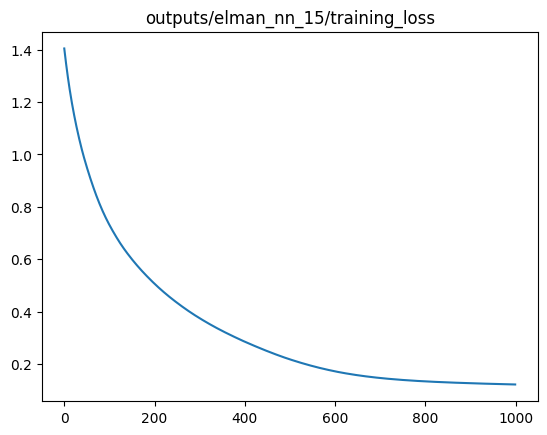

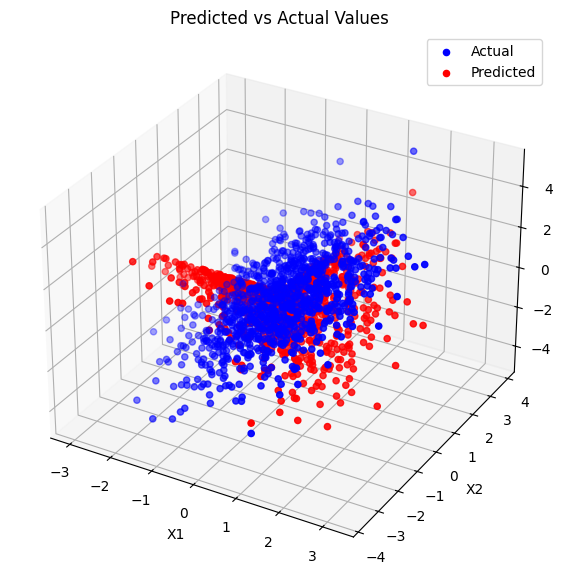

Epoch 100/1000, Loss: 0.7121732234954834
Epoch 200/1000, Loss: 0.4980831444263458
Epoch 300/1000, Loss: 0.3950675129890442
Epoch 400/1000, Loss: 0.33884716033935547
Epoch 500/1000, Loss: 0.29151463508605957
Epoch 600/1000, Loss: 0.24677041172981262
Epoch 700/1000, Loss: 0.21320492029190063
Epoch 800/1000, Loss: 0.18721513450145721
Epoch 900/1000, Loss: 0.17054110765457153
Epoch 1000/1000, Loss: 0.16027435660362244


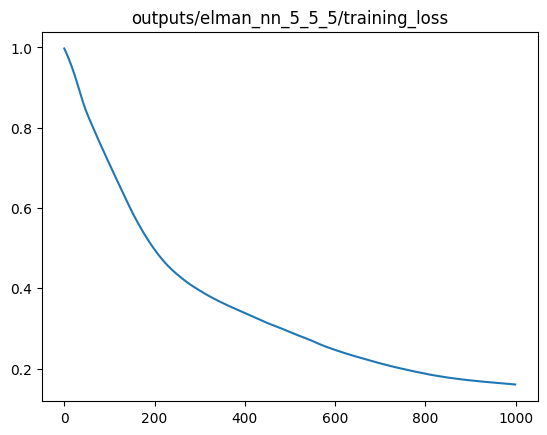

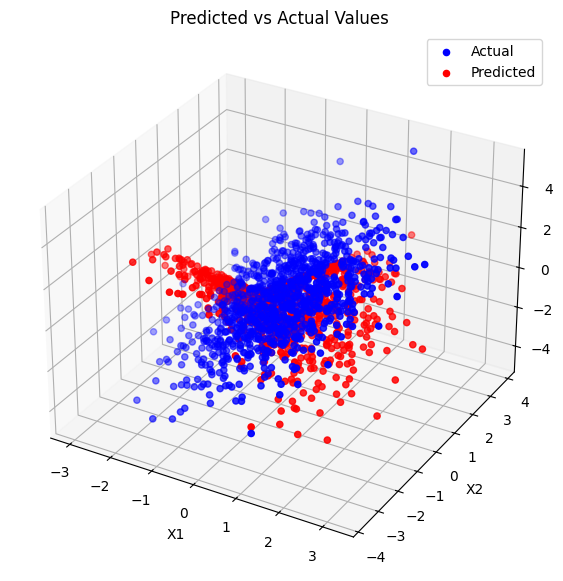

The best model is 'cascade_ffnn_10_10' with a validation loss of 0.11092808842658997.


In [7]:

# x * y 
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import pandas as pd

output_dir = "outputs/"
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

def save_n_plot(*args, filename="file"):
    foldername = "/".join(filename.split("/")[:-1])
    if not os.path.exists(foldername):
        os.mkdir(foldername)
    plt.title(filename)
    plt.plot(*args)
    plt.savefig(filename+".png")
    plt.show()

def save_n_plot_3d(X, y, filename="file_3d"):
    foldername = "/".join(filename.split("/")[:-1])
    if foldername == "":
        foldername = output_dir
        filename = output_dir+filename
    if not os.path.exists(foldername):
        os.mkdir(foldername)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:,0], X[:,1], y)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.title(filename)
    plt.savefig(filename+".png")
    plt.show()

class FFNN(tf.keras.Model):
    def __init__(self, num_neurons):
        super(FFNN, self).__init__()
        self.fc1 = tf.keras.layers.Dense(num_neurons, activation='relu')
        self.fc2 = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.fc1(inputs)
        x = self.fc2(x)
        return x

class CascadeFFNN(tf.keras.Model):
    def __init__(self, num_neurons1, num_neurons2=None):
        super(CascadeFFNN, self).__init__()
        self.fc1 = tf.keras.layers.Dense(num_neurons1, activation='relu')
        if num_neurons2:
            self.fc2 = tf.keras.layers.Dense(num_neurons2, activation='relu')
            self.fc3 = tf.keras.layers.Dense(1)
        else:
            self.fc2 = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.fc1(inputs)
        if hasattr(self, 'fc3'):
            x = self.fc2(x)
            x = self.fc3(x)
        else:
            x = self.fc2(x)
        return x

class ElmanNN(tf.keras.Model):
    def __init__(self, num_neurons1, num_neurons2=None, num_neurons3=None):
        super(ElmanNN, self).__init__()
        self.fc1 = tf.keras.layers.Dense(num_neurons1, activation='relu')
        if num_neurons2:
            self.fc2 = tf.keras.layers.Dense(num_neurons2, activation='relu')
            if num_neurons3:
                self.fc3 = tf.keras.layers.Dense(num_neurons3, activation='relu')
                self.fc4 = tf.keras.layers.Dense(1)
            else:
                self.fc3 = tf.keras.layers.Dense(1)
        else:
            self.fc2 = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.fc1(inputs)
        if hasattr(self, 'fc4'):
            x = self.fc2(x)
            x = self.fc3(x)
            x = self.fc4(x)
        elif hasattr(self, 'fc3'):
            x = self.fc2(x)
            x = self.fc3(x)
        else:
            x = self.fc2(x)
        return x

num_samples = 1000
X_val = tf.random.normal((num_samples, 2))
y_val = tf.reduce_sum(X_val, axis=1)
X = tf.random.normal((num_samples, 2))
y = X[:, 0] * X[:, 1]  

def train_and_plot_model(model, loss_fn, optimizer, X, y, X_val, y_val, model_name, num_epochs=1000):

    foldername = output_dir + model_name
    if not os.path.exists(foldername):
        os.mkdir(foldername)
    
    losses = []
    for epoch in range(num_epochs):
        with tf.GradientTape() as tape:
            outputs = model(X)
            loss = loss_fn(y, outputs)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        losses.append(loss.numpy())
        if (epoch+1) % 100 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.numpy()}')

    loss_df = pd.DataFrame({'Epoch': range(num_epochs), 'Loss': losses})
    loss_df.to_csv(output_dir + model_name + "/losses.csv", index=False)

    save_n_plot(range(num_epochs), losses, filename=output_dir + model_name + "/training_loss")

    y_pred = model(X_val)
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(X_val[:, 0], X_val[:, 1], y_val, color='blue', label='Actual')

    ax.scatter(X_val[:, 0], X_val[:, 1], y_pred.numpy(), color='red', label='Predicted')

    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y')
    ax.set_title('Predicted vs Actual Values')
    ax.legend()

    plt.savefig(output_dir + model_name + "/predicted_vs_actual_3d.png")
    plt.show()

    return losses

models = [FFNN(10), FFNN(20), CascadeFFNN(20), CascadeFFNN(10, 10), ElmanNN(15), ElmanNN(5, 5, 5)]
model_names = ["ffnn_10", "ffnn_20", "cascade_ffnn_20", "cascade_ffnn_10_10", "elman_nn_15", "elman_nn_5_5_5"]

criterions = [tf.keras.losses.MeanSquaredError() for _ in range(6)]
optimizers = [tf.keras.optimizers.SGD() for _ in range(6)]

validation_losses = []
for model, loss_fn, optimizer, model_name in zip(models, criterions, optimizers, model_names):
    loss = train_and_plot_model(model, loss_fn, optimizer, X, y, X_val, y_val, model_name)
    validation_losses.append((model_name, loss))

best_model_name = None
best_validation_loss = float('inf')

for model_name, losses in validation_losses:
    min_loss = min(losses)
    if min_loss < best_validation_loss:
        best_validation_loss = min_loss
        best_model_name = model_name

print(f"The best model is '{best_model_name}' with a validation loss of {best_validation_loss}.")
